### Описание проекта
Анализ развлекательного приложения Procrastinate Pro+. 
##### Проблема:
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.
##### Задача:
Разобраться в причинах убатка и помочь компании выйти в плюс.
#### Основная информация:
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
<br>1. лог сервера с данными об их посещениях,
<br>2. выгрузка их покупок за этот период,
<br>3. рекламные расходы.
#### Нужно изучить:
<br>1.откуда приходят пользователи и какими устройствами они пользуются,
<br>2.сколько стоит привлечение пользователей из различных рекламных каналов;
<br>3.сколько денег приносит каждый клиент,
<br>4.когда расходы на привлечение клиента окупаются,
<br>5.какие факторы мешают привлечению клиентов.

### Информация о данных и их структура:
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.
 ##### Структура visits_info_short.csv:
<br>User Id — уникальный идентификатор пользователя,
<br>Region — страна пользователя,
<br>Device — тип устройства пользователя,
<br>Channel — идентификатор источника перехода,
<br>Session Start — дата и время начала сессии,
<br>Session End — дата и время окончания сессии.
 ##### Структура orders_info_short.csv:
<br>User Id — уникальный идентификатор пользователя,
<br>Event Dt — дата и время покупки,
<br>Revenue — сумма заказа.
 ##### Структура costs_info_short.csv:
<br>dt — дата проведения рекламной кампании,
<br>Channel — идентификатор рекламного источника,
<br>costs — расходы на эту кампанию.

### План выполнения проекта:

#### Шаг 1. Загрузка данные и подготовьте их к анализу
#### Шаг 2. Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.
#### Шаг 3. Исследовательский анализ данных
<br> 3.1 Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
<br> 3.2 Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
<br> 3.3 Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
<br> 3.4Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
#### Шаг 4. Маркетинг
<br> 4.1 Посчитаем общую сумму расходов на маркетинг.
<br> 4.2 Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
<br> 4.3 Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отразим это на одном графике.
<br> 4.4 Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.
#### Шаг 5. Оценка окупаемость рекламы
<br> 5.1 Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
<br> 5.2 Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
<br> 5.3 Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
<br> 5.4 Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
<br> 5.5 Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
#### Шаг 6. Выводы по проекту
<br> 6.1 Выделите причины неэффективности привлечения пользователей.
<br> 6.2 Сформулируйте рекомендации для отдела маркетинга.

### Шаг 1. Загрузка данные и подготовьте их к анализу

In [1]:
# Импотируем нужные библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# Выгружаем данные 
try:
    visits = pd.read_csv('C:\\Users\\37544\\Downloads\\visits_info_short.csv') # посещения
    orders = pd.read_csv('C:\\Users\\37544\\Downloads\\orders_info_short.csv') # заказы
    costs = pd.read_csv('C:\\Users\\37544\\Downloads\\costs_info_short.csv')   # траты на рекламу
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
 # просмотр информации о таблицах и проверка наличия дубликатов
for i in [visits, orders, costs]:
    display(i.head())
    display(i.info())
    print(i.duplicated().sum())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

0


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

0


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

0


Дубликатов нету
<br> Поправим названия строк: поменяем регистр на змеиный и сделаем начальную букву строки маленькой.

In [4]:
# приведение имен столбцов к snake_case
for i in [visits, orders, costs]:
    i.columns = [x.lower().replace(' ', '_') for x in i.columns.values]

In [5]:
# Преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


In [6]:
# Проверяем результат
for i in [visits, orders, costs]:
    display(i.head())
    display(i.info())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Данные загружены, проверены на дубликаты и готовы к анализу.

### Шаг 2. Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Дублируем функции, изученные в предыдущих уроках.
<br>
<br> Функции для вычисления значений метрик: get_profiles(), get_retention(), get_conversion(), get_ltv()
<br> Функции для построения графиков: filter_data(), plot_retention(), plot_conversion(), plot_ltv_roi

#### Функции для метрик:
#### 1. get_profiles() - для создания профиля пользователя

In [7]:
def get_profiles(sessions, orders, costs):
    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg(
                    {
                        'session_start' : 'first',
                        'channel' : 'first',
                        'device' : 'first',
                        'region' : 'first'
                    }
                )
                .rename(columns={'session_start' : 'first_ts'})
                .reset_index()
               )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак пользователей, совершивших покупку
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

    # сортируем сессии по ID пользователя и дате первого посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 
              'channel': 'first',
              'device': 'first',
              'region': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак пользователей, совершивших покупку
    profiles['payer'] = profiles['']

    return profiles 


#### 2. get_retention() - для рассчёта удержания

In [8]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw  = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### 3. get_conversion() - для рассчёта конверсии

In [9]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### 4. Функции для рассчёта LTV и ROI

In [10]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков: 
#### 5. filter_data() - функция для сглаживания фрейма

In [11]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### 6. plot_retention() - для визуализации удержания

In [12]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### 7. plot_conversion() - для визуализации конверсии

In [13]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### 8. Визуализации LTV и ROI

In [14]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Шаг 3. Исследовательский анализ данных

3.1 Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [15]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [16]:
min_prof = profiles.first_ts.min()
max_prof = profiles.first_ts.max()

In [17]:
print('Минимальная дата привлечения пользователей:', min_prof)
print('Максимальная дата привлечения пользователей:', max_prof)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


В данной ситуации возьмём за точку наблюдения возьмём первое число следуюзего месяца - 2019-11-01. Горизонт анализа - две недели(14 дней)

In [18]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

3.2 Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [19]:
# варианты стран, из которых приходят пользователи
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [20]:
# Выделим общее кол-во пользователей по странам и кол-во платящих пользователей по странам
region_users = (
    profiles.groupby('region')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('region')['user_id'].nunique().reset_index(), 
           on = 'region', how = 'left')
)
region_users

,region,user_id_x,user_id_y
0,France,17450,663
1,Germany,14981,616
2,UK,17575,700
3,United States,100002,6902


In [21]:
# Найдём отношение платящих пользователей к общему кол-во пользователей по странам
region_users.columns = ['region', 'total_users', 'payers']
region_users['payer_rate'] = region_users['payers'] / region_users['total_users']
region_users.sort_values('payer_rate', ascending=False)

,region,total_users,payers,payer_rate
3,United States,100002,6902,0.069019
1,Germany,14981,616,0.041119
2,UK,17575,700,0.039829
0,France,17450,663,0.037994


Text(0.5, 1.0, 'Все пользователи по регионам')

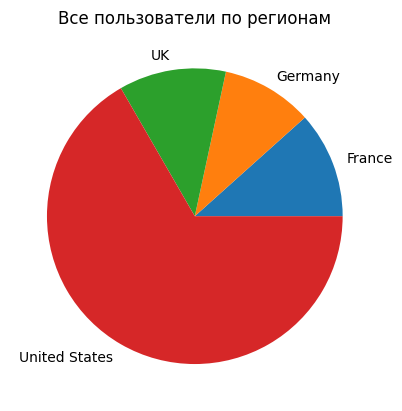

In [22]:
# Построим график всех пользователей по регионам
plt.pie(region_users['total_users'],  labels=region_users['region'])
plt.title('Все пользователи по регионам')

Text(0.5, 1.0, 'Платящие пользователи по регионам')

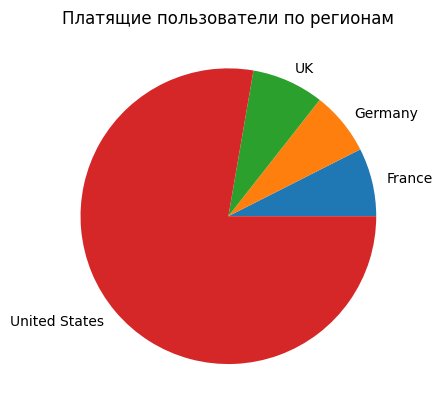

In [23]:
# Построим график платящих пользователей по регионам
plt.pie(region_users['payers'],  labels=region_users['region'])
plt.title('Платящие пользователи по регионам')

Большая часть пользователей из США, после идут пользователи из Великобритании, Франции и Германии. 3/4 платящих пользователей из США.

3.3 Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [24]:
# Виды устройств, из которых приходят пользователи
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [25]:
# С каких устройств чаще захоядт все пользователи, и с каких платящие
device_users = (
    profiles.groupby('device')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('device')['user_id'].nunique().reset_index(), on = 'device', how = 'left')
)
device_users

,device,user_id_x,user_id_y
0,Android,35032,2050
1,Mac,30042,1912
2,PC,30455,1537
3,iPhone,54479,3382


In [26]:
# Найдём отношение платящих пользователей к общему кол-во пользователей по устройствам
device_users.columns = ['device', 'total_users', 'payers']
device_users['payer_rate'] = region_users['payers'] / region_users['total_users']
device_users.sort_values('payer_rate', ascending=False)

,device,total_users,payers,payer_rate
3,iPhone,54479,3382,0.069019
1,Mac,30042,1912,0.041119
2,PC,30455,1537,0.039829
0,Android,35032,2050,0.037994


Text(0.5, 1.0, 'Все пользователи по устройствам')

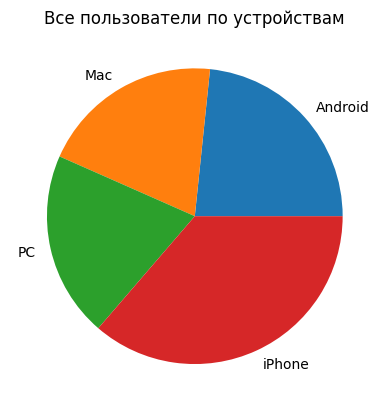

In [27]:
# Построим график всех пользователей по девайсам
plt.pie(device_users['total_users'],  labels=device_users['device'])
plt.title('Все пользователи по устройствам')

Text(0.5, 1.0, 'Платящие пользователи по устройствам')

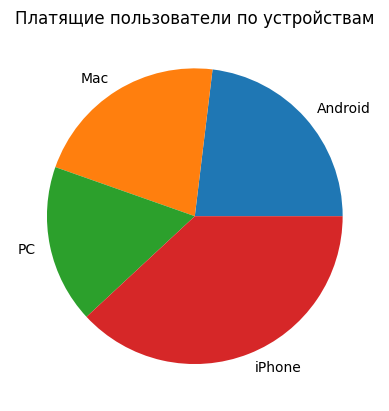

In [28]:
# Построим график платящих пользователей по девайсам
plt.pie(device_users['payers'],  labels=device_users['device'])
plt.title('Платящие пользователи по устройствам')

Пользователей устройства iPhone больше как среди платящих, так и в целом. Далее идут пользователи Android, Maс и PC.

3.4 Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [29]:
profiles['channel'].unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [30]:
# С каких каналов чаще всего заходят все пользователи, и с каких платящие
channel_users = (
    profiles.groupby('channel')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('channel')['user_id'].nunique().reset_index(), on = 'channel', how = 'left')
)
channel_users

,channel,user_id_x,user_id_y
0,AdNonSense,3880,440
1,FaceBoom,29144,3557
2,LeapBob,8553,262
3,MediaTornado,4364,156
4,OppleCreativeMedia,8605,233
5,RocketSuperAds,4448,352
6,TipTop,19561,1878
7,WahooNetBanner,8553,453
8,YRabbit,4312,165
9,lambdaMediaAds,2149,225


In [31]:
# Найдём отношение платящих пользователей к общему кол-во пользователей по устройствам
channel_users.columns = ['channel', 'total_users', 'payers']
channel_users['payer_rate'] = channel_users['payers'] / channel_users['total_users']
channel_users.sort_values('payer_rate', ascending=False)

,channel,total_users,payers,payer_rate
1,FaceBoom,29144,3557,0.122049
0,AdNonSense,3880,440,0.113402
9,lambdaMediaAds,2149,225,0.104700
6,TipTop,19561,1878,0.096007
5,RocketSuperAds,4448,352,0.079137
7,WahooNetBanner,8553,453,0.052964
8,YRabbit,4312,165,0.038265
3,MediaTornado,4364,156,0.035747
2,LeapBob,8553,262,0.030633
4,OppleCreativeMedia,8605,233,0.027077


Text(0.5, 1.0, 'Распределение всех пользователей по каналам')

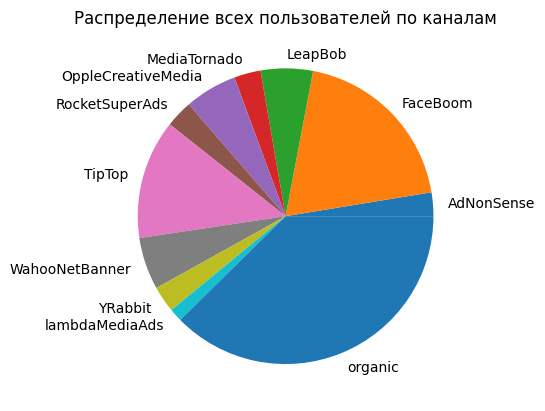

In [32]:
plt.pie(channel_users['total_users'], labels=channel_users['channel'])
plt.title('Распределение всех пользователей по каналам')

Text(0.5, 1.0, 'Распределение платных пользователей по каналам')

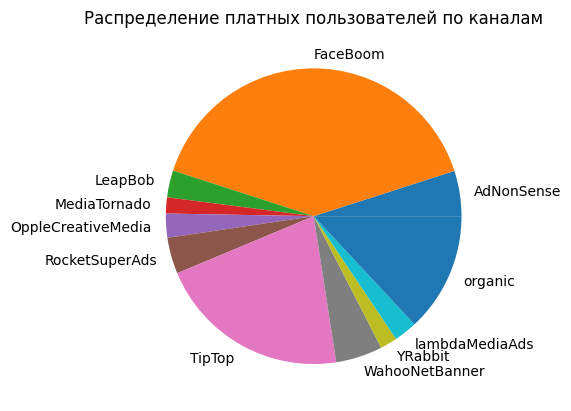

In [33]:
plt.pie(channel_users['payers'], labels=channel_users['channel'])
plt.title('Распределение платных пользователей по каналам')

Больше всего органических пользователей, который сами находят наш продукт. Большая часть же платных пользователей приходят по каналу FaceBoom, TipTop и organic

#### Вывод по 3-ей главе:
<br> 1. Больше всего пользователей из США. Они так же являются самыми платящими пользователями среди других стран. Пользователи из остальных стран занимают примерно 1/4 всех пользователей как в общем, так и среди платящих.
<br> 2. Больше всего пользователей устрайства iPhone и пользователи этого устройства являются самыми плтящими.
<br> 3. Наибольшая часть пользователей являются органическими т.е. сами находят наш продукт. Но среди платящих пользователей больше всего тех, которые приходят к нам из FaceBoom и TipTop.

#### Шаг 4. Маркетинг

4.1 Посчитаем общую сумму расходов на маркетинг.

In [34]:
# Узнаем общую сумму, потраченную на рекламу
costs['costs'].sum()

105497.30000000002

4.2 Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [35]:
costs.groupby('channel')['costs'].sum().sort_values(ascending=False)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

Наибольшие траты по источникам для TipTop и FaceBoom. Траты на остальные источники в разы меньше.

4.3 Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отразим это на одном графике.

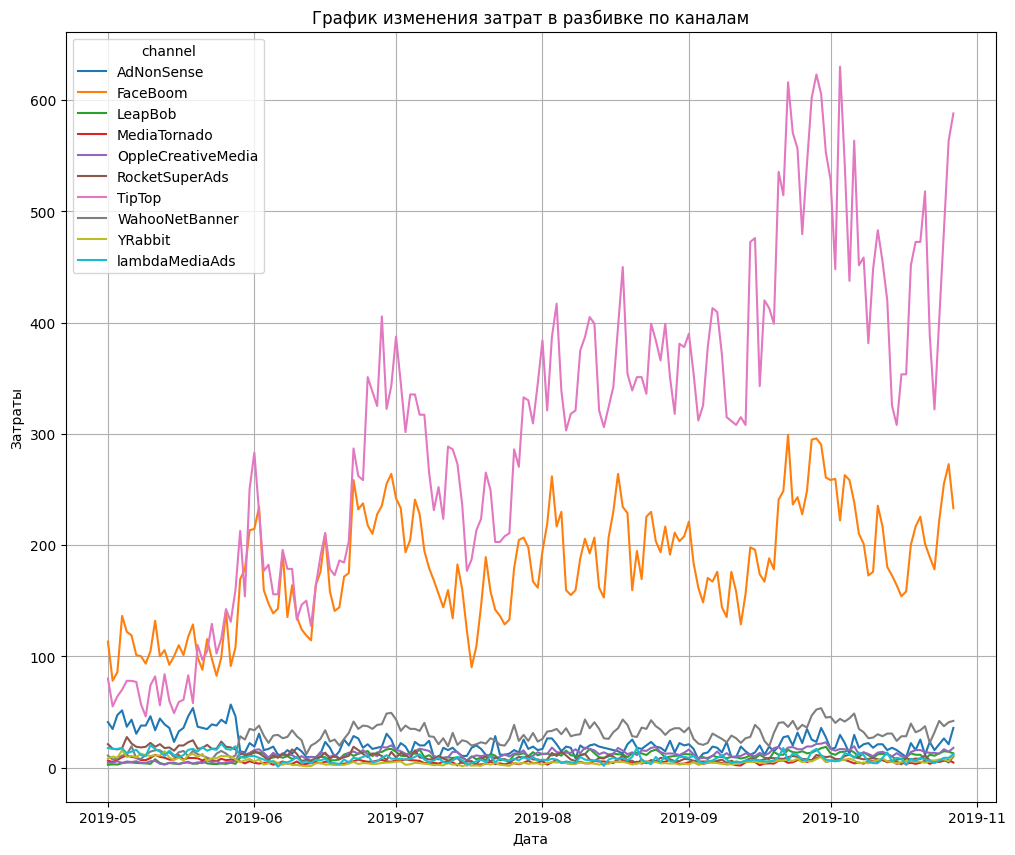

In [49]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10),
           grid=True,)

plt.title('График изменения затрат в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Выделяются два канала: TipTop и FaceBoom. Затраты на их растёт всё время. 

4.4 Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [50]:
# Для начала узнаем, какие каналы приносят больше всего платящих пользователей
ch_users = (
    profiles.groupby('channel')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('channel')['user_id'].nunique().reset_index(), on = 'channel', how = 'left')
)
ch_users.set_axis(['channel', 'total_users', 'payers'], axis='columns', inplace=True)
ch_users['payer_rate'] = ch_users.payers / ch_users.total_users
ch_users.sort_values(by='payer_rate', ascending=False)

C:\Users\37544\AppData\Local\Temp\ipykernel_14324\2555577210.py:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  ch_users.set_axis(['channel', 'total_users', 'payers'], axis='columns', inplace=True)


,channel,total_users,payers,payer_rate
1,FaceBoom,29144,3557,0.122049
0,AdNonSense,3880,440,0.113402
9,lambdaMediaAds,2149,225,0.104700
6,TipTop,19561,1878,0.096007
5,RocketSuperAds,4448,352,0.079137
7,WahooNetBanner,8553,453,0.052964
8,YRabbit,4312,165,0.038265
3,MediaTornado,4364,156,0.035747
2,LeapBob,8553,262,0.030633
4,OppleCreativeMedia,8605,233,0.027077


In [62]:
# Постром таблицу
ad_costs = ch_users.merge(costs.groupby('channel')['costs'].sum().reset_index(), on = 'channel', how = 'left')
ad_costs = ad_costs.query('channel != "organic"')

In [63]:
# CAC-расходы на рекламу делим на размер когорты
ad_costs['cac_costs'] = ad_costs['costs'] / ad_costs['total_users']

In [64]:
# сортируем CAC
ad_costs.sort_values(by='cac_costs', ascending=False)

,channel,total_users,payers,payer_rate,costs,cac_costs
6,TipTop,19561,1878,0.096007,54751.30,2.799003
1,FaceBoom,29144,3557,0.122049,32445.60,1.113286
0,AdNonSense,3880,440,0.113402,3911.25,1.008054
9,lambdaMediaAds,2149,225,0.104700,1557.60,0.724802
7,WahooNetBanner,8553,453,0.052964,5151.00,0.602245
5,RocketSuperAds,4448,352,0.079137,1833.00,0.412095
4,OppleCreativeMedia,8605,233,0.027077,2151.25,0.250000
8,YRabbit,4312,165,0.038265,944.22,0.218975
3,MediaTornado,4364,156,0.035747,954.48,0.218717
2,LeapBob,8553,262,0.030633,1797.60,0.210172


Самая высокая стоимость привлечения одного пользователя у TipTop. Самая низкая у LeapBob.

#### Вывод по 4-ей главе:
<br> 1. Наибольшие траты по источникам для TipTop и FaceBoom. Траты на остальные источники в разы меньше.
<br> 2. Самая высокая стоимость привлечения одного пользователя у TipTop. Самая низкая у LeapBob.


#### Шаг 5. Оценка окупаемость рекламы


5.1 Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [65]:
# Исключим органических пользователей, т.к они бесплатные.
profiles_no = profiles.query('channel != "organic"')

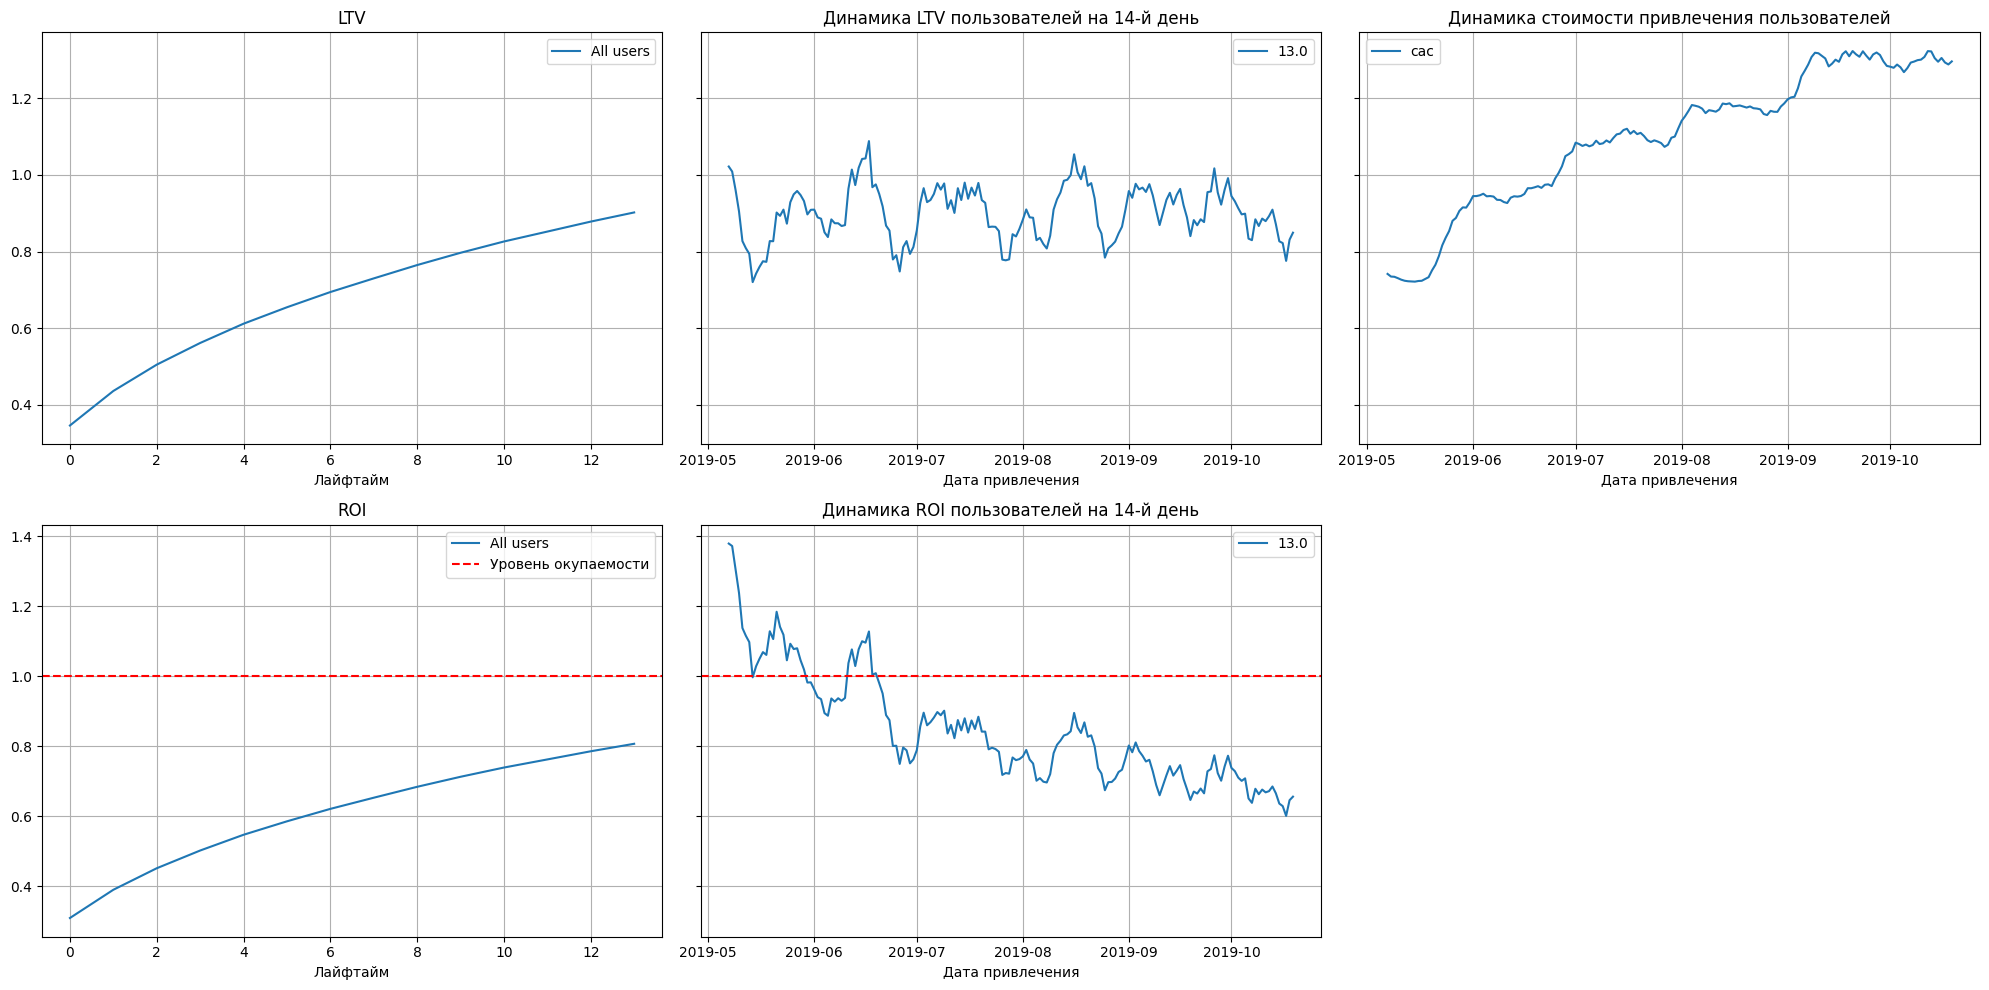

In [66]:
tv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
<br>1. LTV стабилен. Значит, пользователи примерно одинакового качества.<br>2. CAC растет почти все время<br>3. Реклама не окупается. К концу двух недель ROI на уровне 80%

5.2 Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

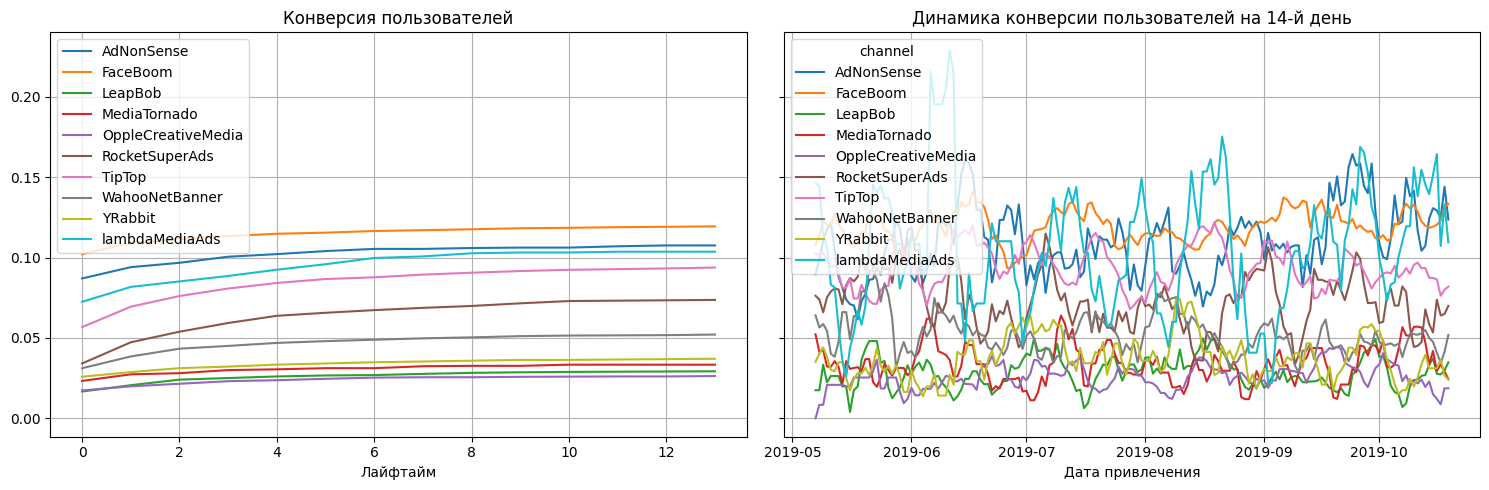

In [67]:
# считаем конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конвертация у пользователей из канала FaceBoom, AdNonSence и lambdaMediaAds. Но при это стоит отметить, что в целом пользователи из всех каналов конвертируются достаточно хорошо.

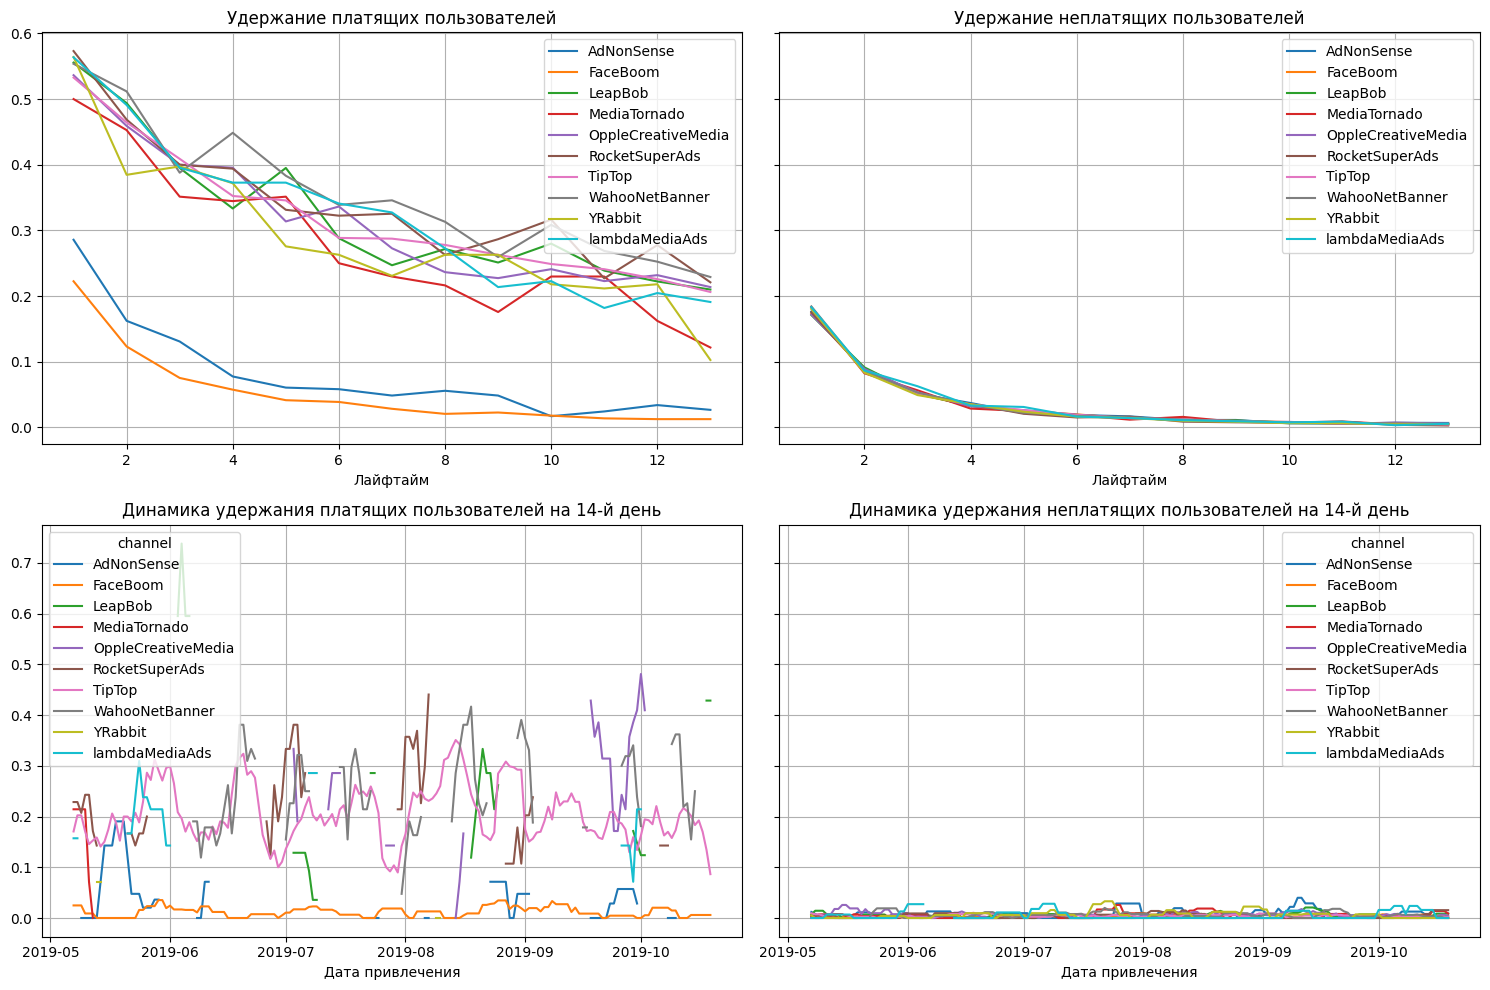

In [68]:
# считаем удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

В целом все каналы, кроме FaceBoom и AdNoneSense умеют достаточно высокое удержание.

 5.3 Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

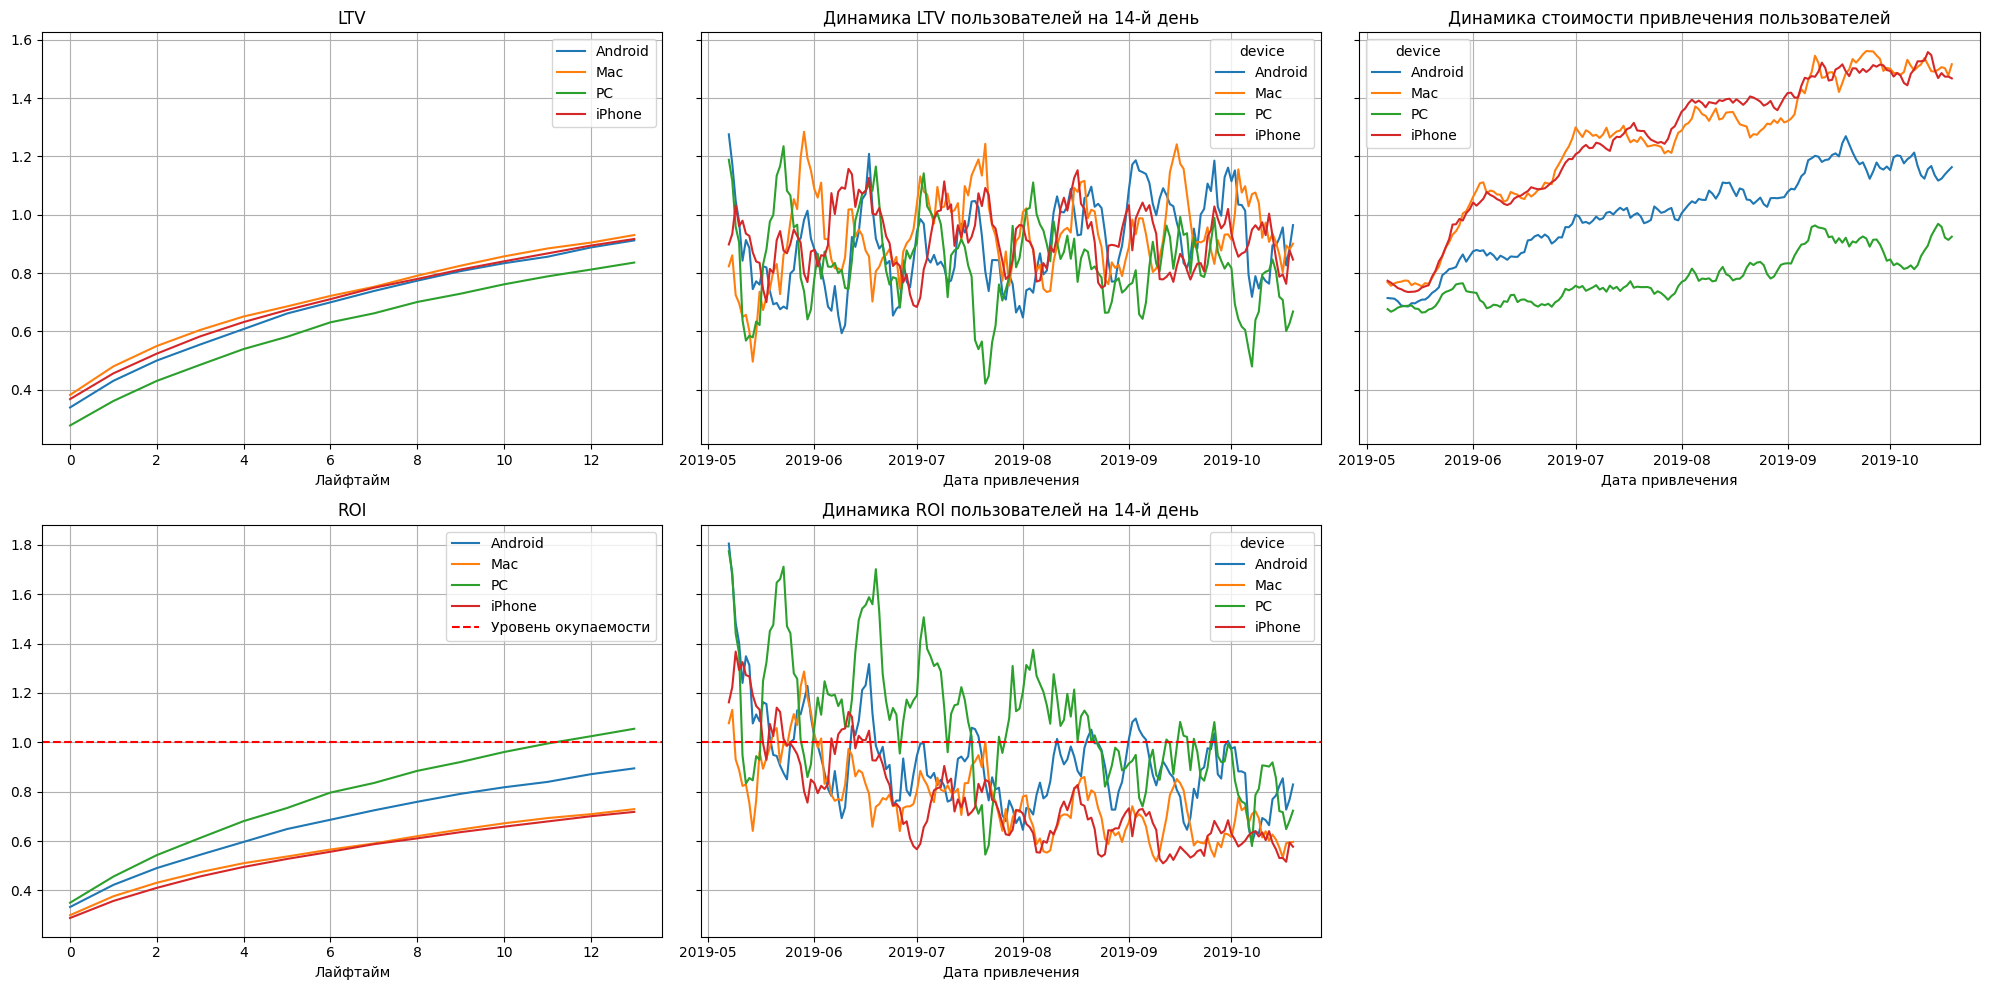

In [69]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

<br> 1. CAC растёт всё время. Самое высокое CAC у устройств MAC и iPhone
<br> 2. По грифику ROI видно, что ко второй неделе окупились только пользователи PC. Окупаемость пользователей iPhone и MAC на самом низком уровне-примерно 75%.


5.4 Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

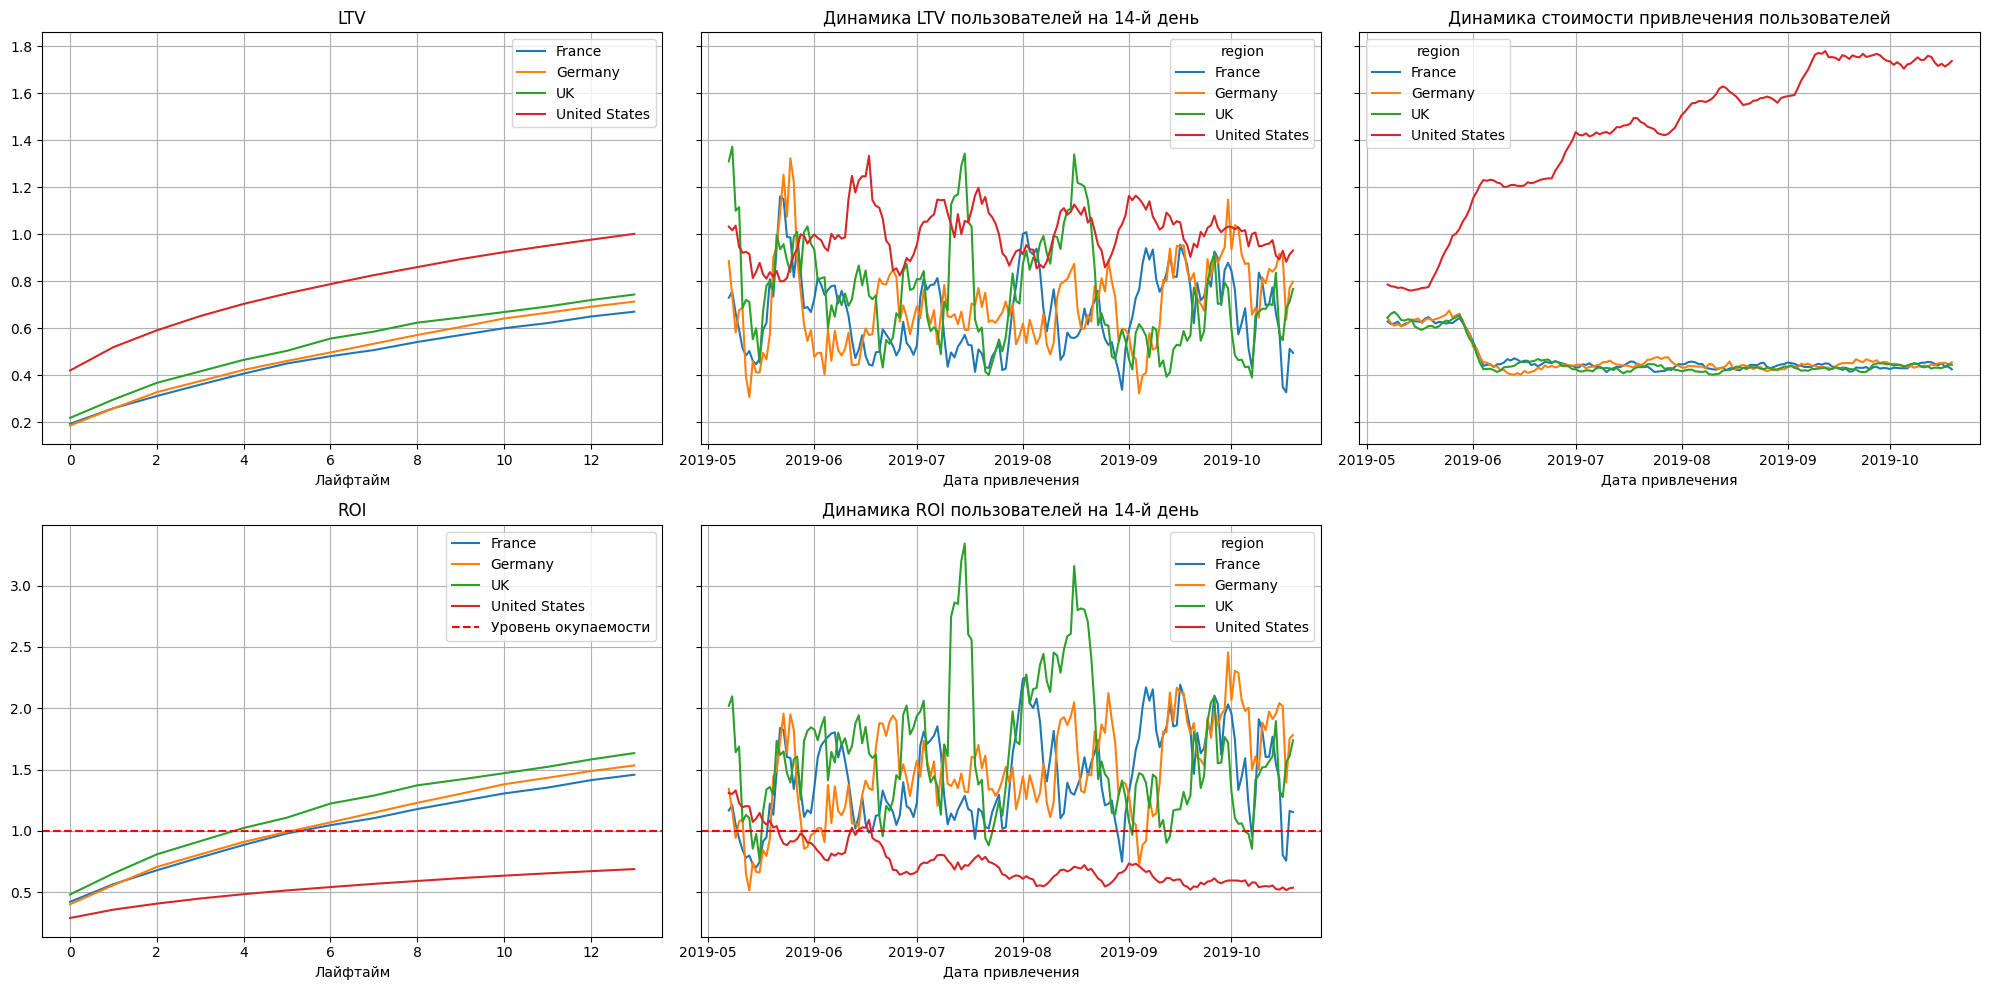

In [70]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Тут мы нашли одно из возможных объяснений нашей проблемы:
<br> 1. CAC почти всех страх, кроме США, падает в начале и после становится стабильным. CAC США же постоянно растёт
<br> 2. по грифику ROI видно, что ко второй неделе окупаются все страны, кроме США. ROI США остается на уровне 60-70%. 

5.5 Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

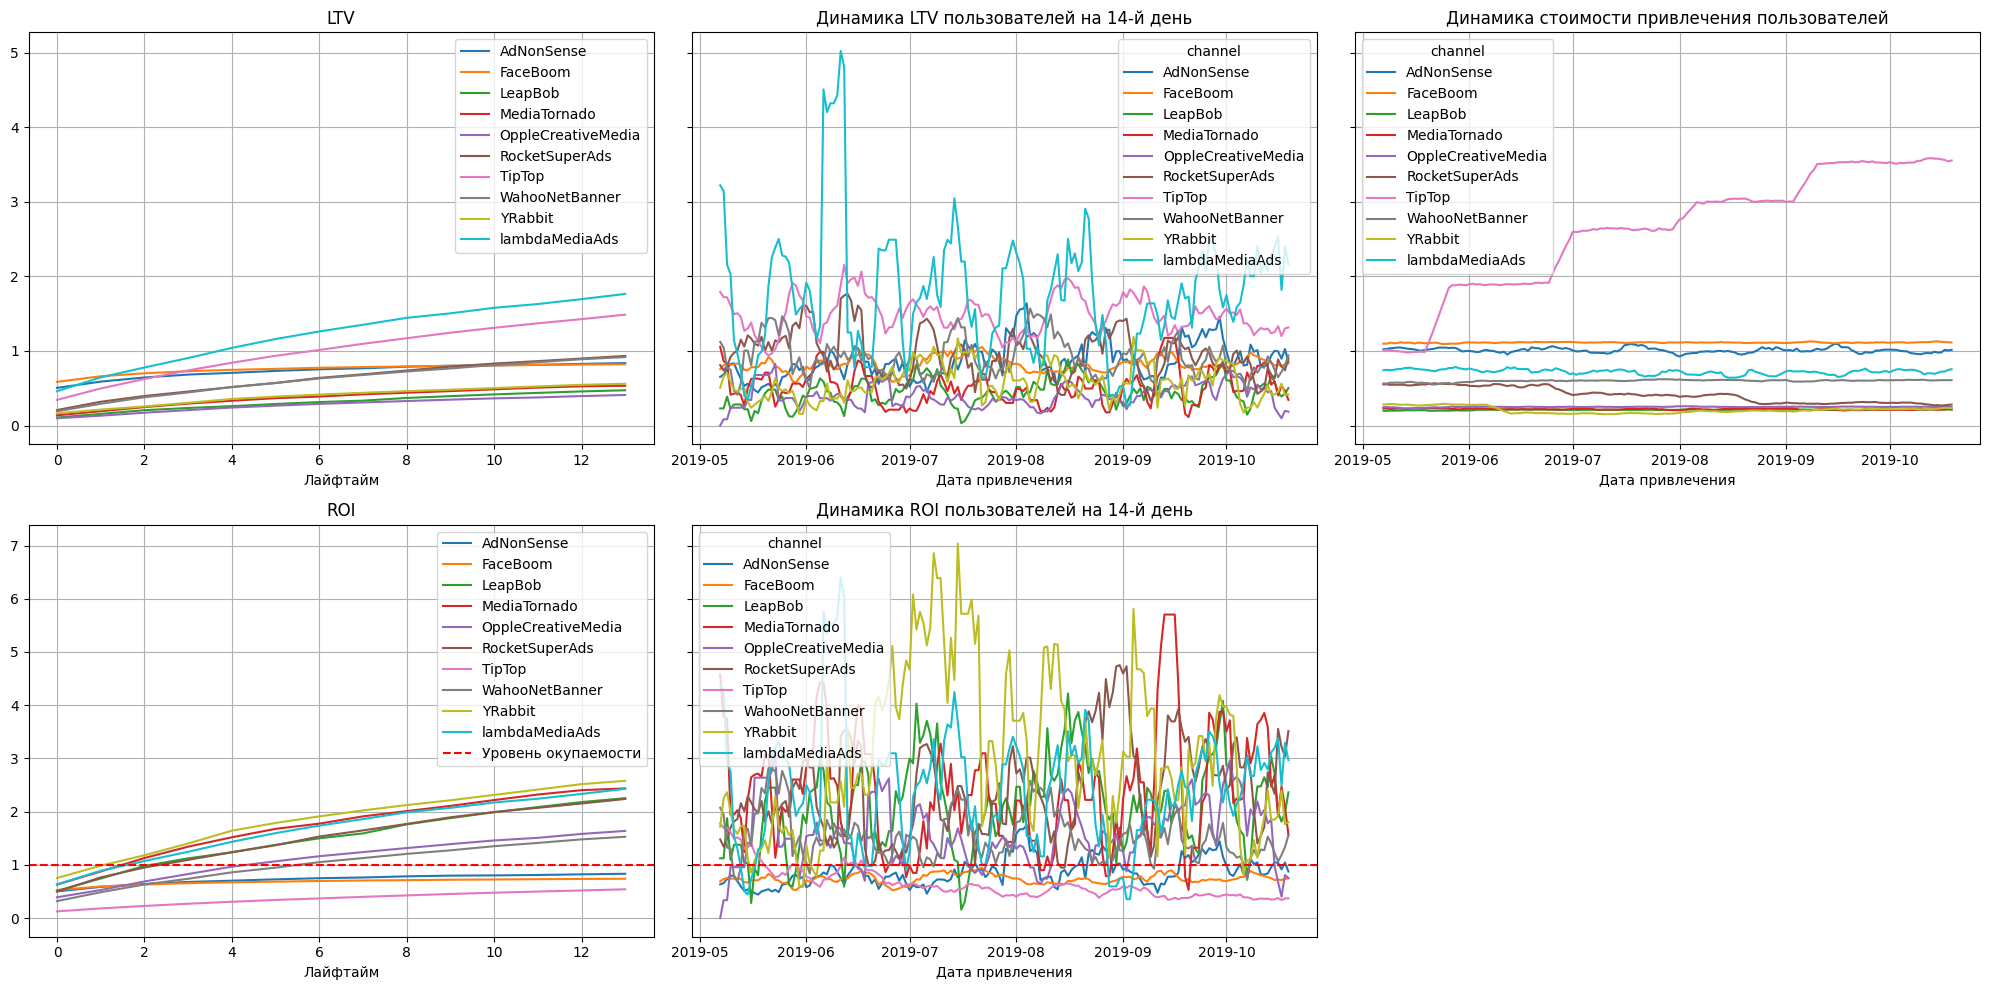

In [71]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Ещё одно возможное объяснение нашей проблемы:
<br> 1. Ко второй неделе окупаются все каналы, кроме AdNonSence, FaceBoom и TipTop.
<br> 2. CAC всех каналов +- стабилен, и только CAC канала TipTop почти всё время растёт.

#### Общий вывод по главе 5:
<br> 1. В целом реклама окупается лишь на 80%.
<br> 2. По устройствам окупаются только пользователи PC, но самая низкая окупаемость у пользователей MAC и iPhone. Если смотреть по странам. то все страны, кроме США, окупаются и динамика стоимости привлечения пользователей CША растёт почти всё время. Если смотреть по каналам, то через 2 недели не окупаются только AdNonSence, FaceBoom и TipTop, при этом CAC всех каналов в среднем стабилен, и только CAC канала TipTop почти всё время растёт.Думаю, маркетологам стоит обратить на это внимание.
<br> 3. Думаю, объяснением динамику роста CAC для пользователей из канала TipTop и из США могут следующие предположения: 1. Увеличение стоимости рекламы и маркетинга; 2. Увеличение стоимости продукта или услуги(если компания подняла цены на свой продукт или услугу, то для привлечения клиентов придется потратить больше денег, и CAC возрастет); 3. Изменение целевой аудитории(если компания начинает нацеливаться на более узкую и дорогую целевую аудиторию, то CAC может возрасти из-за необходимости более дорогой и точечной рекламы)

#### Шаг 6. Выводы по проекту
<br> 6.1 Выделите причины неэффективности привлечения пользователей.
<br>
<br>3 канала инвестиции с которых не окупились: AdNonSense, FaceBoom, TipTop Основными пользователями с этих каналов являются жители США. Также удержание платящих пользователей из США оказалось хуже всех. ROI по странам в динамике показал, что с каждым месяцем привлеченные платящие пользователи из США всё хуже окупались, но динамика стоимости привлечения этих пользователей только наращивалась.

<br>Возможные причины, связанные с проблемой рекламы в США:

<br>Летом 2019 произошло какое-то событие в США, которое кардинально повлияло на поведение пользователей
пользователи Mac и IPhone оказались самыми неплатящими, возможно есть проблема с оптимизацией приложения Procrastinate Pro+ для ios устройств
рекламная система TipTop оказалась неэффективной. Не стоило много вкладывать в этот канал. Можно предположить, что в этой соц сети не сидят жители США, а используют жители других стран, которые подключены к VPN.
<br>Необоснованное увеличение CAC в канале TipTop

<br> Конверсия пользователей FaceBoom была самой высокой, но удержание платящих пользователей было самое низкое. Можно ометить, что этот канал для привлечения работал хорошо, но качество платного контента не устраивало пользователей, поэтому не стоит этот канал списывать со счетов.
<br> 6.2 Сформулируйте рекомендации для отдела маркетинга.
<br>
<br>1. Нужно искать новые каналы для привлечения пользователей из стран: UK и Germany
<br>2. Привлекать больше PC и Android пользователей.
<br>3. Стоит обратить внимание на 3 недооценённых канала с наивысшим ROI: Yrabbit, MediaTornado, lambdaMediaAds
<br>4. Платящие PC пользователи удерживаются очень хорошо, но конверсия самая низкая. Потенциал есть, нужно обратить внимание на саму рекламу
<br>5. Самый высокий LTV у канала lambdaMediaAds. Платящим пользователям явно нравится продукт, можно попробовать найти подешевле канал привлечения для этих пользователей, чтобы увеличить ROI